<a href="https://colab.research.google.com/github/Camves/Tempo_preventiva_Monte_Carlo/blob/main/Tempo_manut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

#Tempo ótimo de manutenção

In [ ]:
df = pd.read_csv("/content/Tempo_Quebra_Equip.csv")
mean = df.mean()
stand = df.std()

In [ ]:
intervalo_man = []
for i in range(101):
  intervalo_man.append(i)
print(intervalo_man)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


Melhor tempo: 11 
Disponibilidade: 78.47687467112952


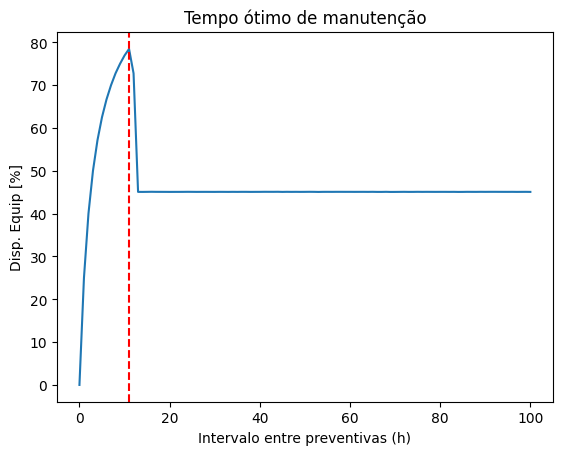

In [ ]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
#Criação de cenários de operação para determinação de tempo ótimo de manutenção. O Equipamento tem uma curva de sobrevivencia estimada em X~Weibull(k=4, lambda = 50)

MC_disponib = []
M = 100 #100 cenários por intervalo de manutenção
T = 8760 #1 ano em horas

for intervalo in intervalo_man:
  disp_vec = []
  for m in range(M):
    soma_disponivel = 0
    soma_parado = 0
    total = 0
    while total<T:
      tempo_man = np.random.normal(loc=3,scale=1.2)
      tempo_reparo = np.random.normal(loc=15,scale=0.8)
      tempo_falha = scipy.stats.weibull_min.rvs(c= mean, scale = stand, size= 1)[0]
      if tempo_falha > intervalo:
        soma_disponivel += intervalo
        soma_parado += tempo_man
      else:
        soma_disponivel += tempo_falha
        soma_parado += tempo_reparo
      total = soma_disponivel+soma_parado
    disp_vec.append(100*soma_disponivel/total)
  MC_disponib.append(np.mean(np.array(disp_vec)))
tempo_otimo = intervalo_man[np.argmax(MC_disponib)]
print('Melhor tempo:',tempo_otimo,'\nDisponibilidade:',np.max(MC_disponib))

plt.plot(intervalo_man,MC_disponib)
plt.title('Tempo ótimo de manutenção')
plt.ylabel('Disp. Equip [%]')
plt.xlabel('Intervalo entre preventivas (h)')
plt.axvline(tempo_otimo,color ='red',linestyle='dashed')
